In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [7]:
##data preprocessing
#training image preprocessing


training_set=tf.keras.utils.image_dataset_from_directory(
    'Training',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(225, 225),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 2870 files belonging to 4 classes.


In [8]:
###validation image preprocessing

##data preprocessing
#training image preprocessing


validation_set=tf.keras.utils.image_dataset_from_directory(
    'validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(225, 225),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
   
    verbose=True,
)

Found 1311 files belonging to 4 classes.


In [9]:
testing_set=tf.keras.utils.image_dataset_from_directory(
    'validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(225, 225),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
   
    verbose=True,
)

Found 1311 files belonging to 4 classes.


In [10]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 225, 225, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [11]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   ...
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]]

  [[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   ...
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]]

  [[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   ...
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]]

  ...

  [[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   ...
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 

In [12]:
##building model

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [13]:
model=Sequential()

In [14]:
#building convolutional layer
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[225,225,3]))

model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
          
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\ayyap\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
#building convolutional layer
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))

model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
          
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
#building convolutional layer
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))

model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
          
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
#building convolutional layer
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))

model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
          
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
#building convolutional layer
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))

model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
          
model.add(MaxPool2D(pool_size=2,strides=2))

In [19]:
model.add(Dropout(0.25))

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(units=1500,activation='relu'))

In [22]:
model.add(Dropout(0.4))

In [23]:
#output layer
model.add(Dense(units=4,activation='softmax'))

In [26]:
#compiling model

model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 225, 225, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 223, 223, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 111, 111, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 54, 54, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 10, 10, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │      19,201,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           6,004 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,919,728 (91.25 MB)

 Trainable params: 23,919,728 (91.25 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
##training model

training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 321s 4s/step - accuracy: 0.3792 - loss: 2.0742 - val_accuracy: 0.5278 - val_loss: 1.1152
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 320s 4s/step - accuracy: 0.6361 - loss: 0.8688 - val_accuracy: 0.6735 - val_loss: 0.8037
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 318s 4s/step - accuracy: 0.7273 - loss: 0.6473 - val_accuracy: 0.7193 - val_loss: 0.6658
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 318s 4s/step - accuracy: 0.7972 - loss: 0.5179 - val_accuracy: 0.6865 - val_loss: 0.7750
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 329s 4s/step - accuracy: 0.8603 - loss: 0.3842 - val_accuracy: 0.7780 - val_loss: 0.6024
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 329s 4s/step - accuracy: 0.8790 - loss: 0.3031 - val_accuracy: 0.7902 - val_loss: 0.5832
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 319s 4s/step - accuracy: 0.9286 - loss: 0.2037 - val_accuracy: 0.8024 - val_loss: 0.5782
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 319s 4s/step - accuracy: 0.9501 - loss: 0.1344 - val_accuracy: 0.8085 - v

In [29]:
#model evaluation on training set

train_loss,train_acc=model.evaluate(training_set)

90/90 ━━━━━━━━━━━━━━━━━━━━ 74s 828ms/step - accuracy: 0.9633 - loss: 0.0919


In [30]:
print(train_loss,train_acc)

0.08405137062072754 0.9665505290031433


In [31]:
#model on validation set


val_loss,val_acc=model.evaluate(validation_set)


41/41 ━━━━━━━━━━━━━━━━━━━━ 32s 778ms/step - accuracy: 0.8157 - loss: 0.5744


In [32]:
print(val_loss,val_acc)

0.5876026749610901 0.8169336318969727


In [33]:
#saving model

model.save("trained_model1.keras")

In [34]:
training_history.history

{'accuracy': [0.4853658676147461,
  0.6554006934165955,
  0.7397212386131287,
  0.8108013868331909,
  0.8703832626342773,
  0.8891986012458801,
  0.9348431825637817,
  0.9501742124557495,
  0.9648083448410034,
  0.9679442644119263],
 'loss': [1.333486557006836,
  0.8171778321266174,
  0.6232669353485107,
  0.4955316185951233,
  0.34867405891418457,
  0.28248921036720276,
  0.19601178169250488,
  0.13819505274295807,
  0.0992971733212471,
  0.09825843572616577],
 'val_accuracy': [0.527841329574585,
  0.6735316514968872,
  0.719298243522644,
  0.6864988803863525,
  0.7780320644378662,
  0.7902364730834961,
  0.802440881729126,
  0.8085430860519409,
  0.8245614171028137,
  0.8169336318969727],
 'val_loss': [1.1151660680770874,
  0.8037084341049194,
  0.6658430099487305,
  0.774965763092041,
  0.6024350523948669,
  0.5831735730171204,
  0.5782409906387329,
  0.5800211429595947,
  0.5590000152587891,
  0.5876026153564453]}

In [35]:
#recording history in json

import json

with open("training_hist1.json","w") as f:
    json.dump(training_history.history,f)
    



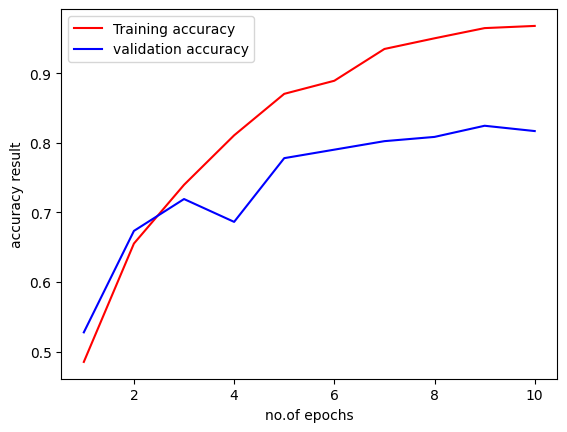

In [36]:
##accuracy visualization

epochs=[i for i in range(1,11)]
epochs
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='validation accuracy')
plt.xlabel("no.of epochs")
plt.ylabel("accuracy result")
plt.legend()
plt.show()

In [37]:
#some other metrics for model evaluation

class_name=testing_set.class_names
class_name

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [38]:
y_pred=model.predict(testing_set)
y_pred,y_pred.shape

41/41 ━━━━━━━━━━━━━━━━━━━━ 33s 790ms/step


(array([[9.99632239e-01, 1.07575170e-05, 3.34019191e-04, 2.29081743e-05],
        [9.69904959e-01, 2.41503050e-03, 2.32294507e-04, 2.74477080e-02],
        [9.99091625e-01, 8.88710783e-04, 2.97595398e-06, 1.67402923e-05],
        ...,
        [1.68545157e-01, 1.06858954e-01, 7.21161544e-01, 3.43433721e-03],
        [1.57318637e-01, 8.88559502e-03, 3.41542989e-01, 4.92252678e-01],
        [2.91846014e-09, 1.43046998e-06, 3.73547593e-08, 9.99998569e-01]],
       dtype=float32),
 (1311, 4))

In [43]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [44]:
predicted_categories

<tf.Tensor: shape=(1311,), dtype=int64, numpy=array([0, 0, 0, ..., 2, 3, 3], dtype=int64)>

In [45]:
true_categories=tf.concat([y for x,y in testing_set],axis=0)
true_categories

<tf.Tensor: shape=(1311, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)>

In [49]:
y_true=tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(1311,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [50]:
from sklearn.metrics import classification_report,confusion_matrix


In [51]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                  precision    recall  f1-score   support

    glioma_tumor       0.71      0.86      0.78       300
meningioma_tumor       0.81      0.65      0.72       306
        no_tumor       0.87      0.91      0.89       405
 pituitary_tumor       0.88      0.82      0.85       300

        accuracy                           0.82      1311
       macro avg       0.82      0.81      0.81      1311
    weighted avg       0.82      0.82      0.82      1311



In [52]:
cm=confusion_matrix(y_true,predicted_categories)
print(cm)
cm.shape

[[259  18   8  15]
 [ 76 200  14  16]
 [ 16  20 367   2]
 [ 12   8  35 245]]


(4, 4)

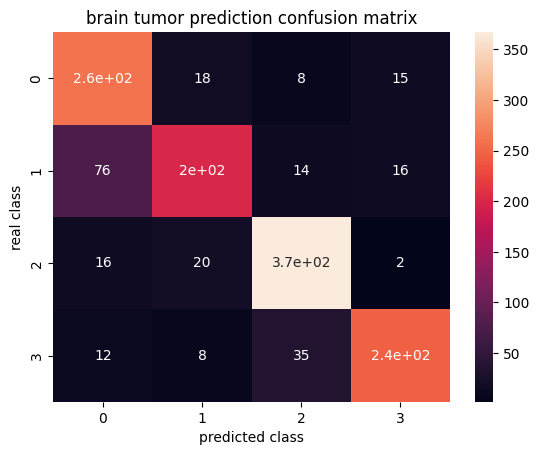

In [53]:
##confusionmatrix visualization

sns.heatmap(cm,annot=True)
plt.xlabel("predicted class")
plt.ylabel("real class")
plt.title("brain tumor prediction confusion matrix")
plt.show()


